In [31]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm

In [32]:
tf.keras.backend.set_floatx("float64")

In [91]:
address = "b_12x30.h5" # change this
burgers_net = tf.keras.models.load_model(address)

# make a function `u(t, x)` to use model easier
u = lambda t, x: burgers_net(tf.concat([t, x], axis=1))

63/63 [==============================] - 0s 6ms/step


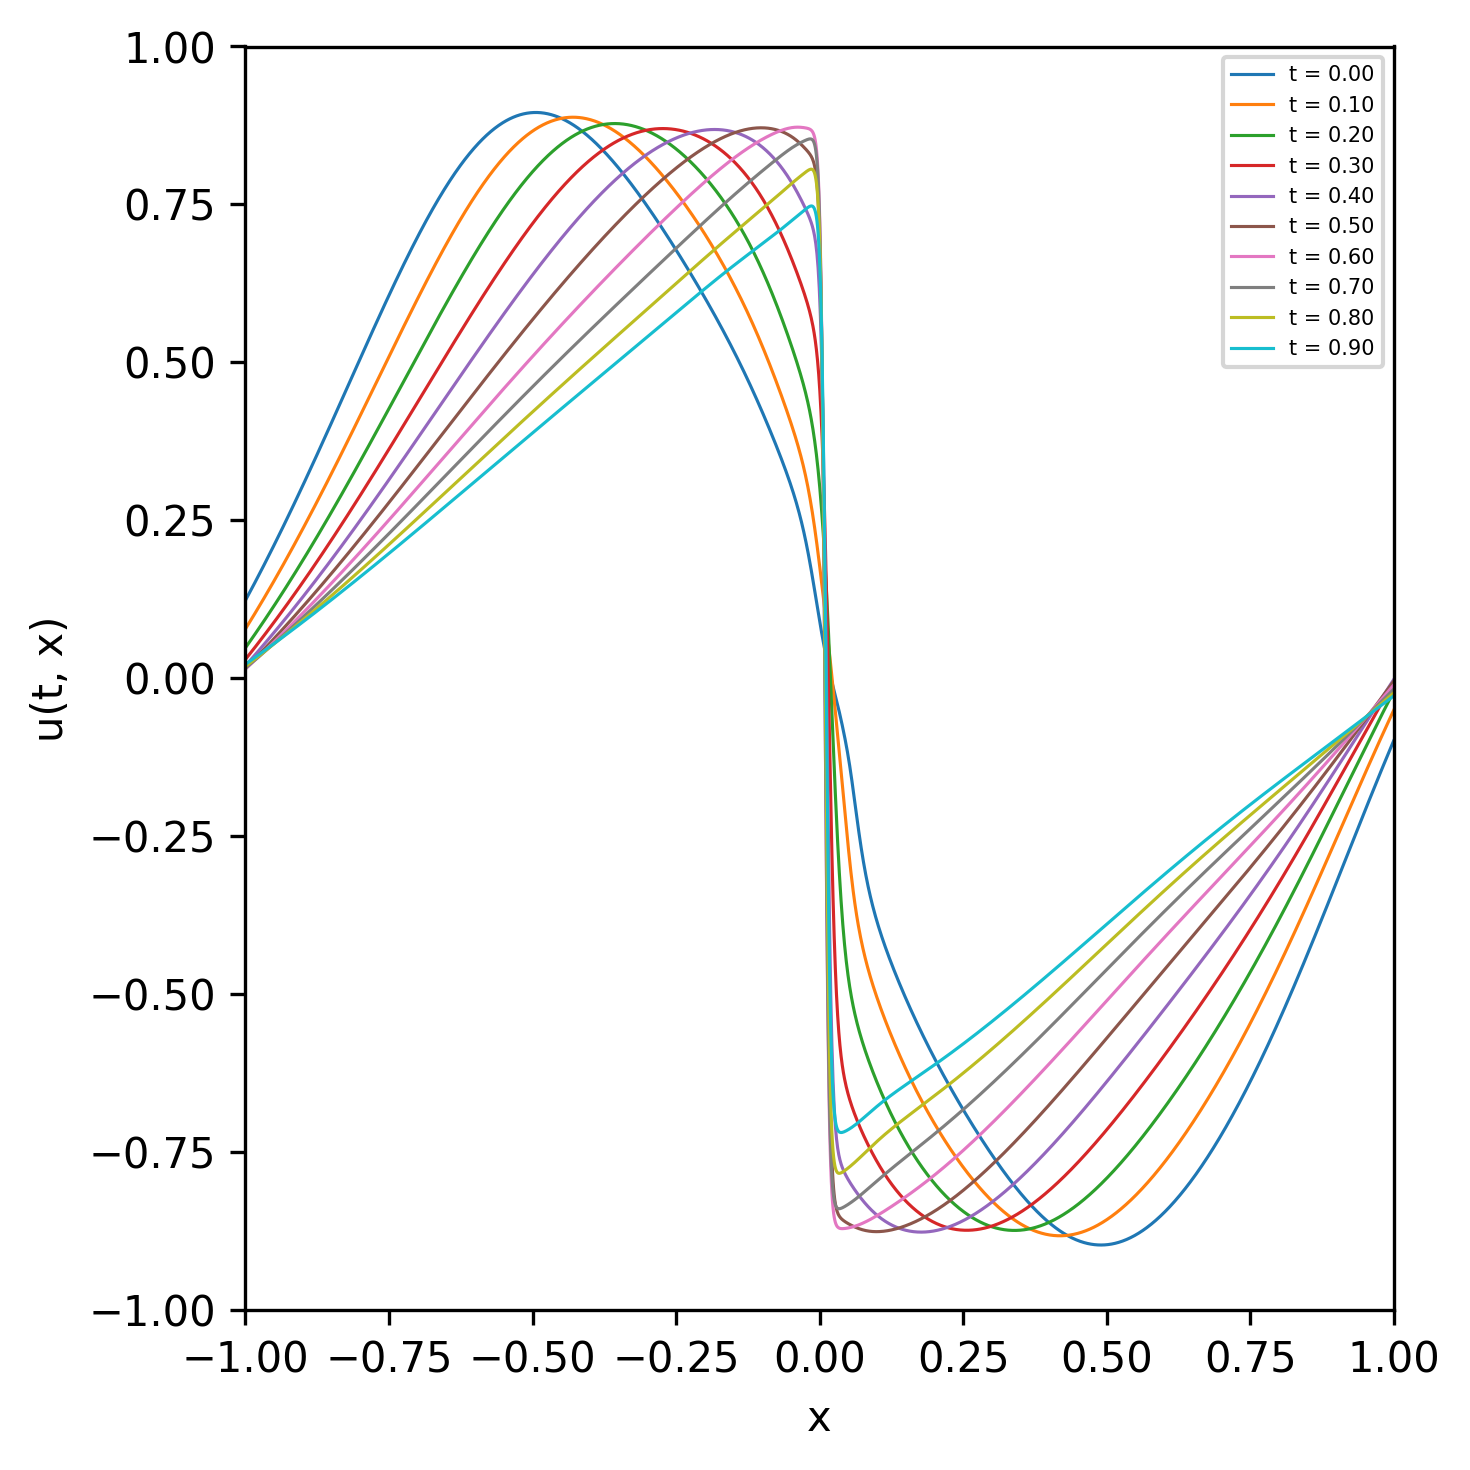

In [88]:
plt.figure(figsize=(5, 5), dpi=300)
# input shape
n_temporal, n_spatial = 10, 2000
# combine (x, t) as a vector
v = np.zeros([n_spatial, 2]) # v[:, 0] = t, v[:, 1] = x
v[:, 1] = np.linspace(-1, +1, n_spatial)
# change t
for i in range(n_temporal):
    v[:, 0] = i/n_temporal
    plt.plot(v[:, 1], burgers_net.predict(v), label=f"t = {i/n_temporal:.2f}", lw=0.75)

plt.legend(loc="upper right", fontsize=5)
plt.xlim(-1, +1)
plt.ylim(-1, +1)
plt.ylabel(f"u(t, x)")
plt.xlabel(f"x")
plt.tight_layout()
#plt.savefig("u-constant-time_0.5.png")
plt.show()

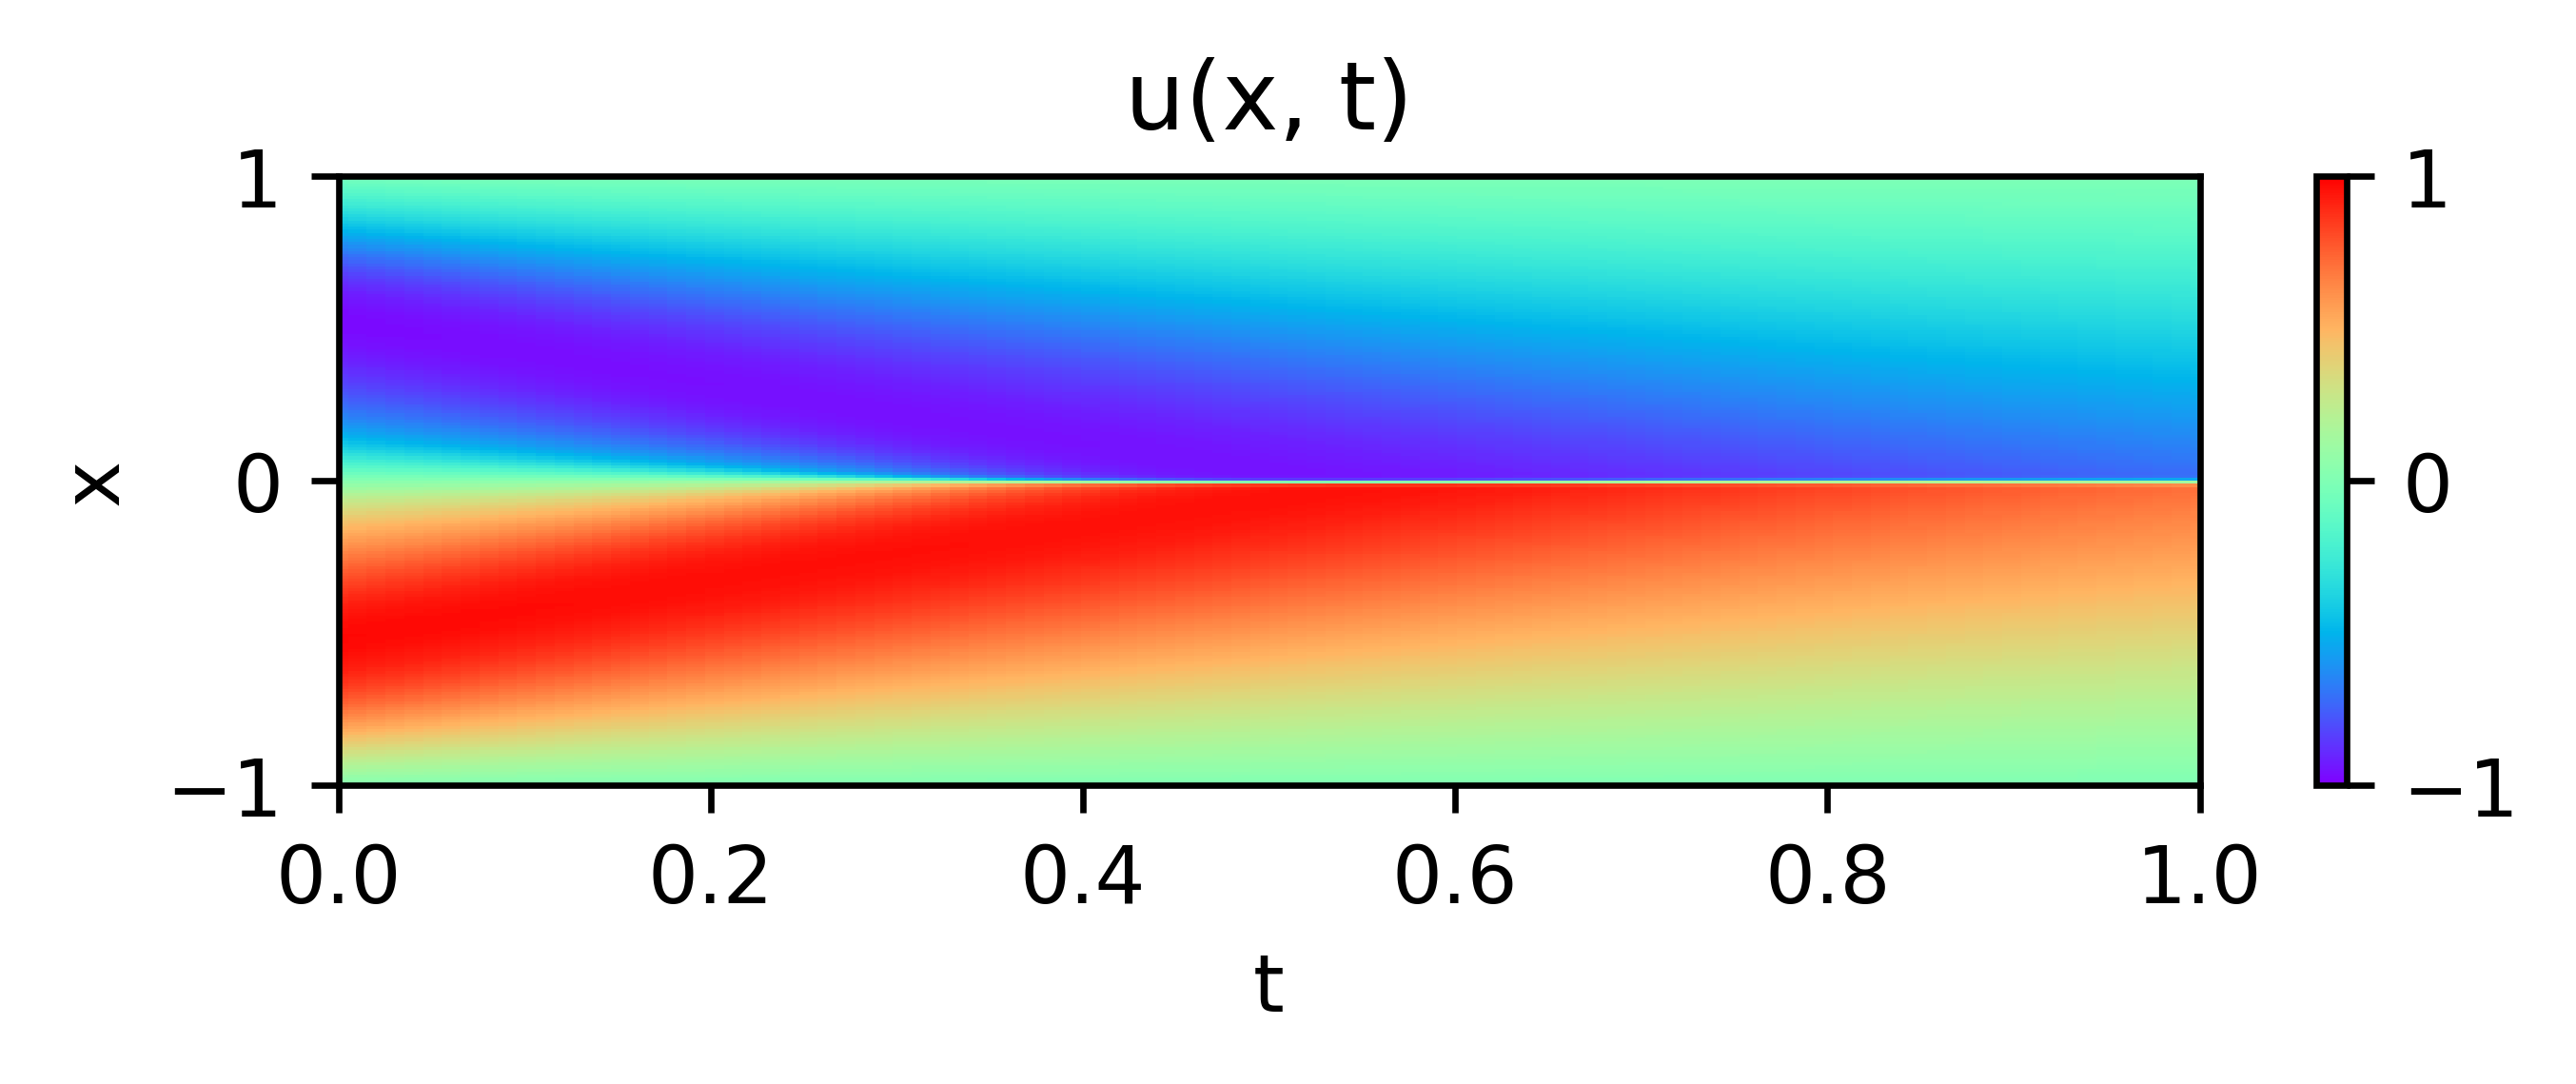

In [92]:
n, m = 100, 200

X = np.linspace(-1., +1., m)
T = np.linspace(0., 1., n)

X0, T0 = np.meshgrid(X, T)
X = X0.reshape([n*m, 1])
T = T0.reshape([n*m, 1])

T, X = map(tf.convert_to_tensor, [T, X])
#
X.shape, T.shape
plt.figure(figsize=(5, 2), dpi=600)
U = burgers_net(tf.concat([T, X], axis=1))
U = U.numpy().reshape(n, m)
plt.pcolormesh(T0, X0, U, cmap=cm.rainbow)
plt.colorbar()
plt.xlim(0., +1.)
plt.ylim(-1., +1.)
plt.clim(-1, +1)
plt.title("u(x, t)")
plt.ylabel("x")
plt.xlabel("t")
plt.tight_layout()
#plt.savefig("u-profile_6x60.png")
plt.show()

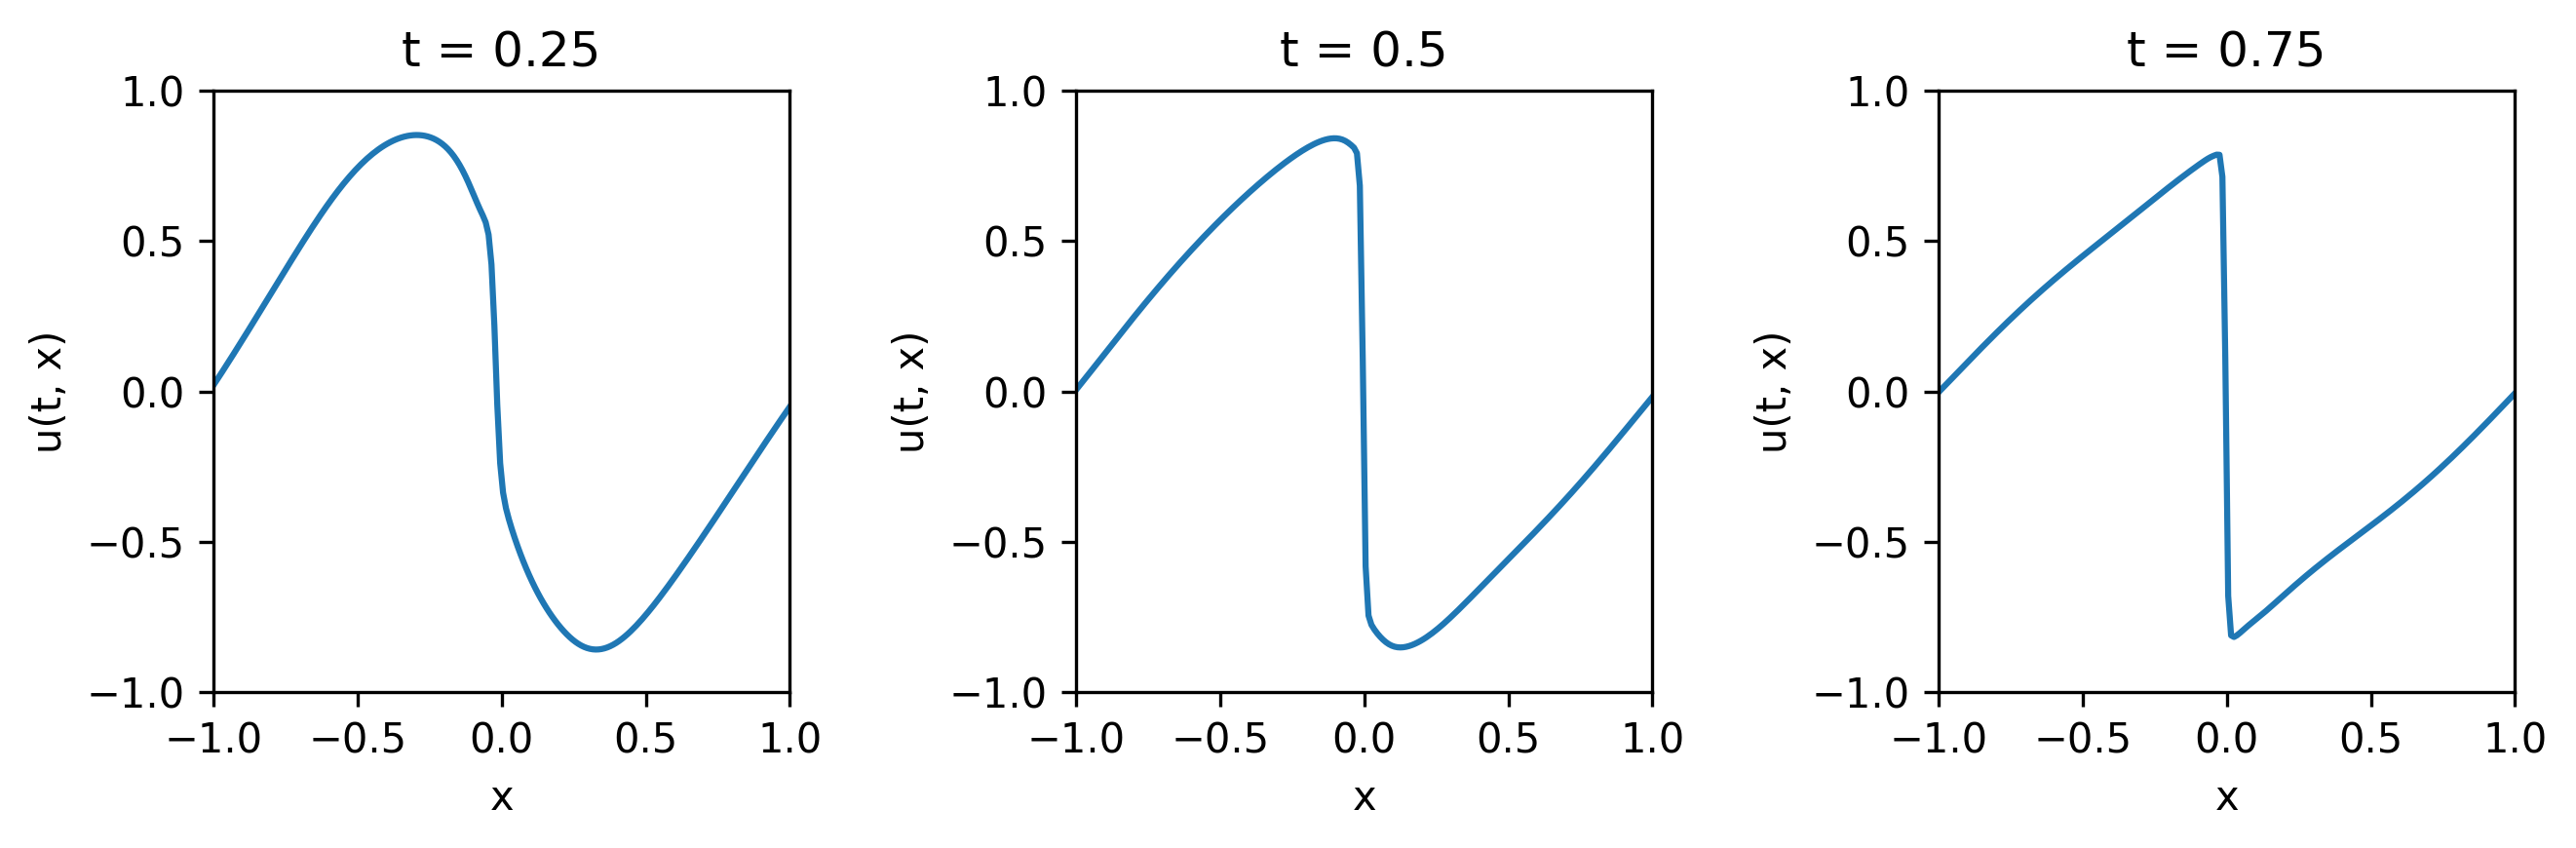

In [66]:
x = np.expand_dims(np.linspace(-1, +1, 200), axis=1)

plt.figure(figsize=(9, 3), dpi=300)
for i, time_point in enumerate([0.25, 0.50, 0.75], start=1):
    t = np.ones_like(x) * time_point
    plt.subplot(130+i)
    plt.title(f"t = {time_point}")
    plt.plot(x, u(t, x))
    plt.ylabel(f"u(t, x)")
    plt.xlabel(f"x")
    plt.xlim(-1, +1)
    plt.ylim(-1, +1)

#
plt.tight_layout()
#plt.savefig("u-vs-x_6x60.png")
plt.show()